# Analisis de datos B2B

In [2]:
import sys
import pandas as pd
import numpy as np
import nltk

import re
from joblib import dump, load
import matplotlib.pyplot as plt
pd.options.display.max_colwidth=200
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

import scipy.stats as stats
import seaborn as sns; sns.set()  # for plot styling
from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Metricas
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# q-q plots
import scipy.stats as stats

# !!!! + AGRUPACION
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering



from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm



In [3]:
import sys
!{sys.executable} -m pip install scikit-learn-extra



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## Carga de datos

In [4]:
df = pd.read_csv('base_3_transaccional_b2b.txt', sep = '\t')



In [5]:
df_B2B = df.copy()

Se cargan los datos de la empresa de datos B2B en un dataframe de pandas. Se realiza una copia del dataframe para evitar modificar el original. 

A continuación se realiza el analisis y entendimiento de los datos de la base B2B

# 1. Entendimiento y Perfilamiento de datos

In [5]:
df_B2B.shape

(25866, 10)

In [6]:
df_B2B.dtypes

fecha_factura                                 object
id_b2b                                        object
municipio                                     object
zona                                          object
categoria_b2b_macro                           object
categoria_b2b                                 object
subcategoria_b2b                              object
producto                                      object
valor_total                                  float64
alineación con portafolio estratégico b2b    float64
dtype: object

In [6]:
df_B2B.columns.tolist()

['fecha_factura',
 'id_b2b',
 'municipio',
 'zona',
 'categoria_b2b_macro',
 'categoria_b2b',
 'subcategoria_b2b',
 'producto',
 'valor_total',
 'alineación con portafolio estratégico b2b']

In [7]:
df_B2B.head(5)

,fecha_factura,id_b2b,municipio,zona,categoria_b2b_macro,categoria_b2b,subcategoria_b2b,producto,valor_total,alineación con portafolio estratégico b2b
0,2007-01-03,B2B_01,MADRID,CUNDINAMARCA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_1,Producto_1,1819.931192,0.000216
1,2007-01-03,B2B_01,MADRID,CUNDINAMARCA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_1,Producto_2,1713.359382,0.000077
2,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_2,cat_b2b_3,sub_b2b_3,Producto_4,208.510406,0.000069
3,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_11,Producto_13,3319.449852,0.000308
4,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_12,Producto_14,4945.685288,0.000110


Se evidencia que la fecha se estaba almacenando como un objeto, por lo que se convierte a un dato de tipo datetime.

In [8]:
df_B2B['fecha_factura'] = pd.to_datetime(
    df_B2B['fecha_factura'].astype(str).str.strip(),
    format='%Y-%m-%d',
    errors='coerce'
)


In [9]:
df_B2B

,fecha_factura,id_b2b,municipio,zona,categoria_b2b_macro,categoria_b2b,subcategoria_b2b,producto,valor_total,alineación con portafolio estratégico b2b
0,2007-01-03,B2B_01,MADRID,CUNDINAMARCA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_1,Producto_1,1819.931192,0.000216
1,2007-01-03,B2B_01,MADRID,CUNDINAMARCA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_1,Producto_2,1713.359382,0.000077
2,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_2,cat_b2b_3,sub_b2b_3,Producto_4,208.510406,0.000069
3,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_11,Producto_13,3319.449852,0.000308
4,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_12,Producto_14,4945.685288,0.000110
...,...,...,...,...,...,...,...,...,...,...
25861,2010-02-18,B2B_05,FUSAGASUGA,CUNDINAMARCA,cat_b2b_macro_11,cat_b2b_14,sub_b2b_23,Producto_66,303.853648,0.000654
25862,2010-02-18,B2B_05,FUSAGASUGA,CUNDINAMARCA,cat_b2b_macro_14,cat_b2b_14,sub_b2b_23,Producto_809,85.641002,0.000654
25863,2010-02-18,B2B_05,FUSAGASUGA,CUNDINAMARCA,cat_b2b_macro_15,cat_b2b_15,sub_b2b_24,Producto_1049,75.615354,0.000654
25864,2010-02-18,B2B_06,TUNJA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_43,Producto_1255,2640.812674,0.000654


In [10]:
column_titles = df_B2B.columns.tolist()
column_titles

['fecha_factura',
 'id_b2b',
 'municipio',
 'zona',
 'categoria_b2b_macro',
 'categoria_b2b',
 'subcategoria_b2b',
 'producto',
 'valor_total',
 'alineación con portafolio estratégico b2b']

In [11]:
# Para categorizar las variables en su tipo de dato
categorical_cols = df_B2B.select_dtypes(include=["object"]).columns
numeric_cols = df_B2B.select_dtypes(include=["number"]).columns
datetime_cols = df_B2B.select_dtypes(include=["datetime"]).columns

# Imprimir las variables categóricas
print("Variables categóricas:")
print(", ".join(categorical_cols))

# Imprimir las variables numéricas
print("\nVariables numéricas:")
print(", ".join(numeric_cols))

# Imprimir las variables de fecha
print("\nVariables de fecha:")
print(", ".join(datetime_cols))

Variables categóricas:
id_b2b, municipio, zona, categoria_b2b_macro, categoria_b2b, subcategoria_b2b, producto

Variables numéricas:
valor_total, alineación con portafolio estratégico b2b

Variables de fecha:
fecha_factura


## 1.1. Atributos numéricos, categoricos y de Fecha

### 1.1.1 Atributos numéricos

In [12]:
atributosNum = df_B2B.select_dtypes(include=[np.number]).columns


In [13]:
df_B2B[atributosNum].describe()

,valor_total,alineación con portafolio estratégico b2b
count,25866.000000,25866.000000
mean,1535.979362,0.000294
std,2257.971976,0.000155
min,5.219884,-0.008032
25%,168.112753,0.000225
50%,525.062748,0.000292
75%,2191.560508,0.000371
max,68751.946040,0.000654


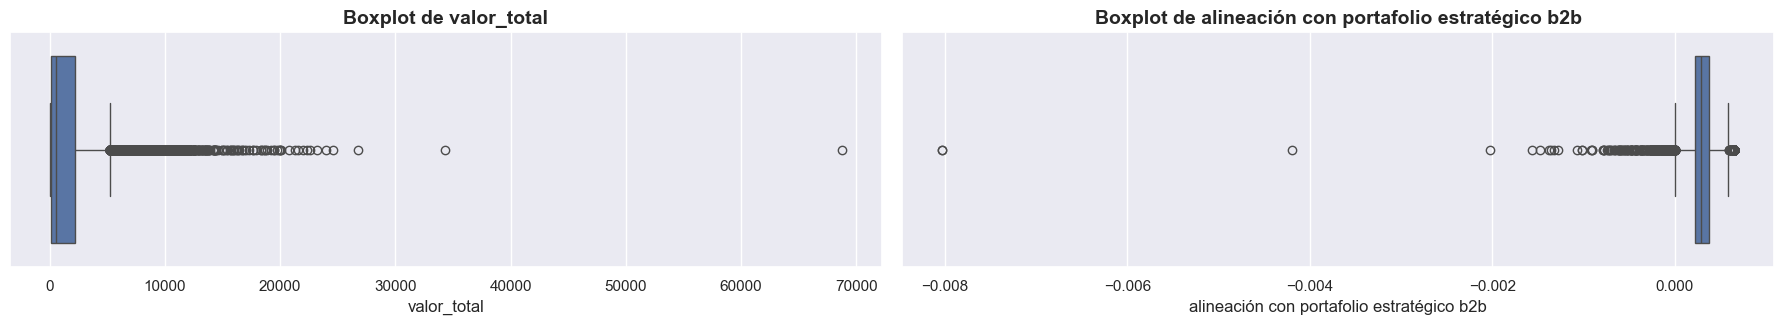

In [14]:
# Se puede graficar el histograma de cada atributo numérico para ver como se distribuyen
plt.figure(figsize=(18, 24))
for i, col in enumerate(atributosNum, 1):
    plt.subplot(8, 2, i)
    sns.boxplot(x=df_B2B[col])
    plt.title(f'Boxplot de {col}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [15]:
def plot_outliers(df, column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Boxplot
    sns.boxplot(y=df[column], ax=axes[0], color='lightblue')
    axes[0].set_title(f'Boxplot of {column}')

    # Histogram
    sns.histplot(df[column], bins=30, kde=True, ax=axes[1], color='lightblue')
    axes[1].set_title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()
def Scatter_distribution(df, vars_to_plot):
    num_vars = len(vars_to_plot)
    rows = cols = int(num_vars ** 0.5) + 1  # Create a near-square grid
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    axes = axes.flatten()

    for i, var in enumerate(vars_to_plot):
        axes[i].scatter(df.index, df[var], alpha=0.5, s=10)
        axes[i].set_title(var)
        axes[i].set_ylabel(var)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


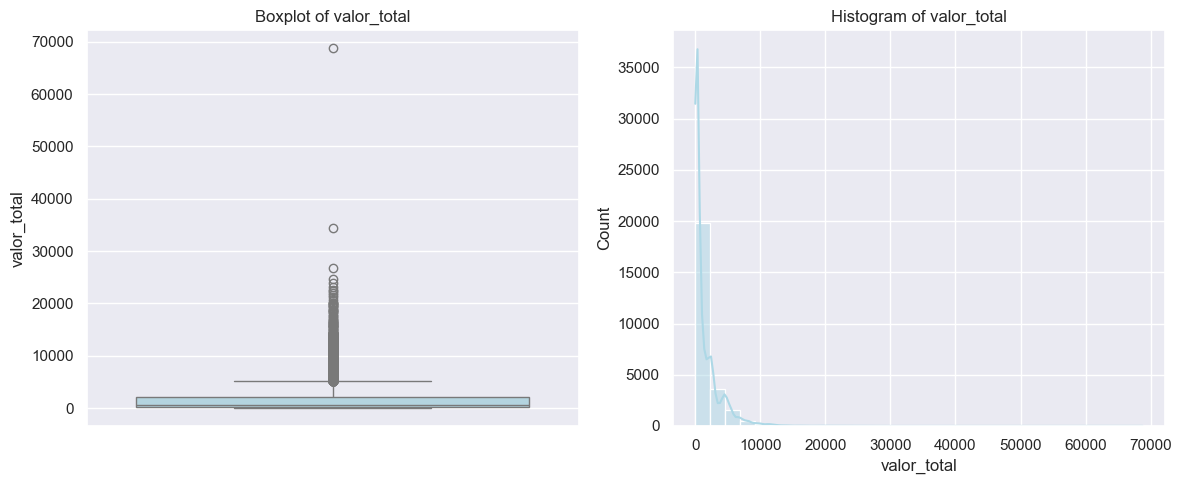

In [16]:
plot_outliers(df_B2B, 'valor_total')

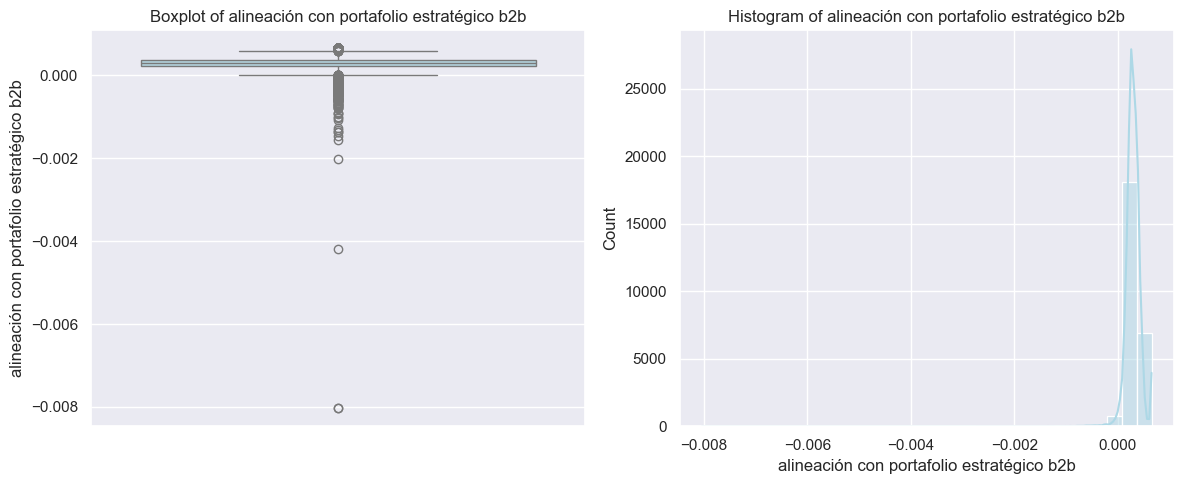

In [17]:
plot_outliers(df_B2B, 'alineación con portafolio estratégico b2b')

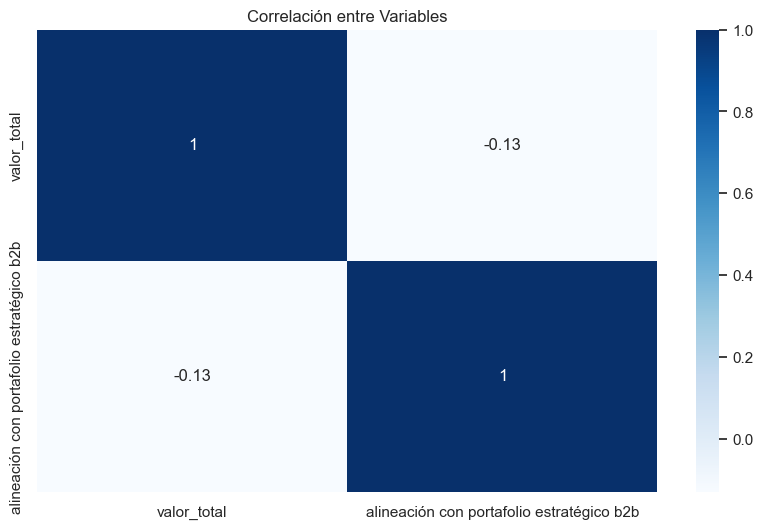

In [18]:
df_numeric = df_B2B.select_dtypes(include=[np.number])
# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap = "Blues")

# Mostrar el gráfico
plt.title("Correlación entre Variables")
plt.show()

#### Análisis de distribución de variables numércas significativas

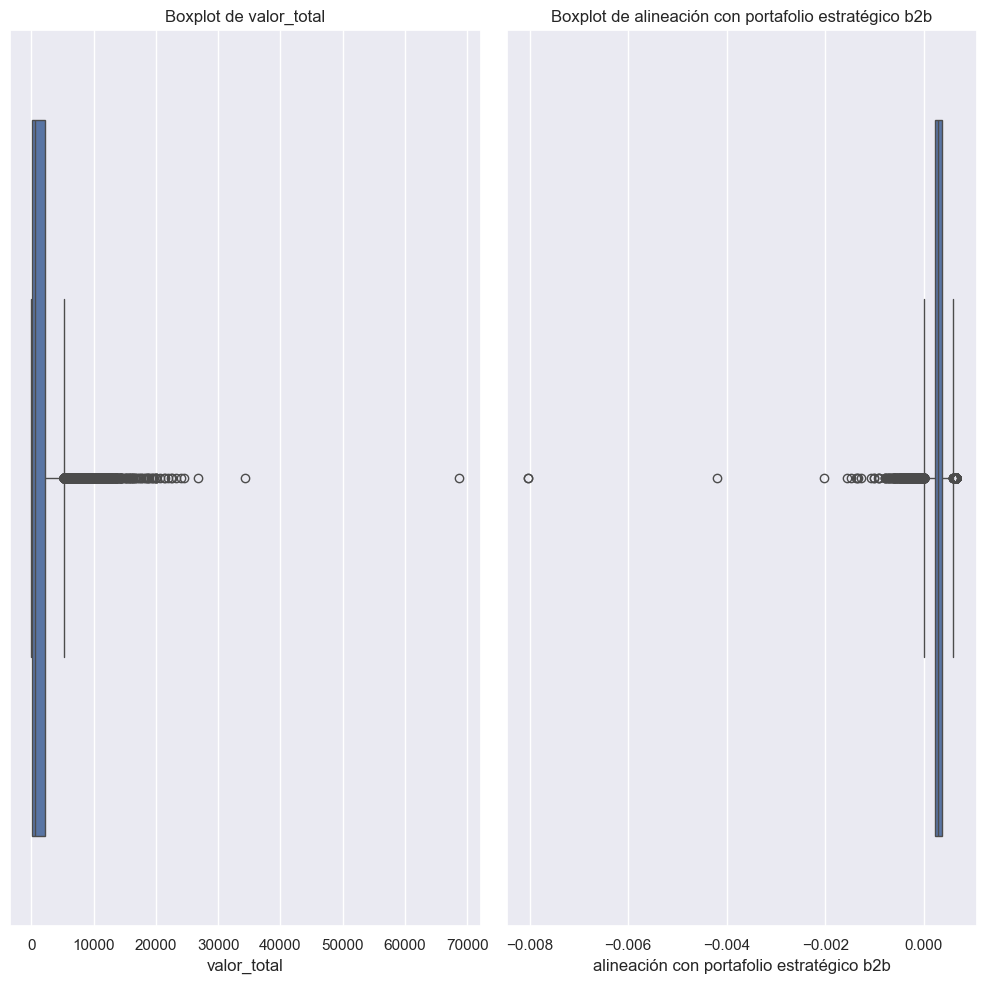

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_data = df_B2B.select_dtypes(include=[float, int])

# Configurar el tamaño de los gráficos
plt.figure(figsize=(15, 10))
num_vars = len(numeric_data.columns)
n_cols = 3 
n_rows = int(np.ceil(num_vars / n_cols))  

# Crear un boxplot para cada variable numérica
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(n_rows, n_cols, i)  
    sns.boxplot(data=numeric_data, x=column)
    plt.title(f'Boxplot de {column}')
    plt.tight_layout()

plt.show()

Si se quiere ver sin **valores atipicos**

Valor total

In [20]:
# Valor Máximo = Q3 + 1.5 × (Q3 - Q1)
q1 = df_B2B["valor_total"].quantile(0.25)
q3 = df_B2B["valor_total"].quantile(0.75)
umbral = q3 + (q3 - q1) * 1.5
umbral

5226.732139749999

In [21]:
cantidadRSMenoresAlUmbral = (df_B2B["valor_total"] < umbral).sum()
porcentajeRSMenoresAlUmbral = 100 * cantidadRSMenoresAlUmbral / len(df_B2B['valor_total'])

print(f'Cantidad de duraciones menores a {umbral}: {cantidadRSMenoresAlUmbral}')
print(f'Porcentaje de duraciones menores a {umbral}: {porcentajeRSMenoresAlUmbral:.2f}%')

Cantidad de duraciones menores a 5226.732139749999: 24143
Porcentaje de duraciones menores a 5226.732139749999: 93.34%


alineación con portafolio estratégico b2b

In [22]:
# Valor Máximo = Q3 + 1.5 × (Q3 - Q1)
q1 = df_B2B["alineación con portafolio estratégico b2b"].quantile(0.25)
q3 = df_B2B["alineación con portafolio estratégico b2b"].quantile(0.75)
umbral = q3 + (q3 - q1) * 1.5
umbral_min = q1 - 1.5 * (q3 - q1)
umbral

0.0005891273644042126

In [23]:
cantidadRSMayoresAlUmbral = (df_B2B["alineación con portafolio estratégico b2b"] > umbral_min).sum()
porcentajeRSMayoresAlUmbral = 100 * cantidadRSMayoresAlUmbral / len(df_B2B["alineación con portafolio estratégico b2b"])

print(f'Cantidad de duraciones mayores a {umbral}: {cantidadRSMayoresAlUmbral}')
print(f'Porcentaje de duraciones mayores a {umbral}: {porcentajeRSMayoresAlUmbral:.2f}%')

Cantidad de duraciones mayores a 0.0005891273644042126: 25466
Porcentaje de duraciones mayores a 0.0005891273644042126: 98.45%


### 1.1.2 Atributos categoricos

In [24]:
categorical_cols

Index(['id_b2b', 'municipio', 'zona', 'categoria_b2b_macro', 'categoria_b2b',
       'subcategoria_b2b', 'producto'],
      dtype='object')

In [25]:
# Con esta tablita puedo ver que porcentaje representa cada clase, si se desea se puede cambiar la columna (tocaria una a una)
atributosCategoricos = df_B2B['municipio'].value_counts()
pd.DataFrame({'Valores de Grupo': atributosCategoricos.index, 'Conteo': atributosCategoricos.values, 'Porcentaje (%)': atributosCategoricos.values * 100 / atributosCategoricos.values.sum()}).sort_values(by='Conteo', ascending=False)

,Valores de Grupo,Conteo,Porcentaje (%)
0,FUSAGASUGA,16263,62.874043
1,VILLA DE LEYVA,6583,25.450398
2,MADRID,2142,8.281141
3,TUNJA,479,1.851852
4,#,399,1.542566


In [26]:
# Con esta tablita puedo ver que porcentaje representa cada clase, si se desea se puede cambiar la columna (tocaria una a una)
atributosCategoricos = df_B2B['zona'].value_counts()
pd.DataFrame({'zona': atributosCategoricos.index, 'Conteo': atributosCategoricos.values, 'Porcentaje (%)': atributosCategoricos.values * 100 / atributosCategoricos.values.sum()}).sort_values(by='Conteo', ascending=False)

,zona,Conteo,Porcentaje (%)
0,CUNDINAMARCA,18405,71.155184
1,BOYACA,7062,27.302250
2,Sin asignar,399,1.542566


In [27]:
# Con esta tablita puedo ver que porcentaje representa cada clase, si se desea se puede cambiar la columna (tocaria una a una)
atributosCategoricos = df_B2B['categoria_b2b_macro'].value_counts()
pd.DataFrame({'Valores de Grupo': atributosCategoricos.index, 'Conteo': atributosCategoricos.values, 'Porcentaje (%)': atributosCategoricos.values * 100 / atributosCategoricos.values.sum()}).sort_values(by='Conteo', ascending=False)

,Valores de Grupo,Conteo,Porcentaje (%)
0,cat_b2b_macro_1,5768,22.299544
1,cat_b2b_macro_3,5163,19.960566
2,cat_b2b_macro_5,3489,13.488750
3,cat_b2b_macro_2,3470,13.415294
4,cat_b2b_macro_4,2397,9.266991
5,cat_b2b_macro_9,1756,6.788835
6,cat_b2b_macro_10,901,3.483337
7,cat_b2b_macro_8,835,3.228176
8,cat_b2b_macro_6,777,3.003943
9,cat_b2b_macro_11,330,1.275806


In [28]:
# Con esta tablita puedo ver que porcentaje representa cada clase, si se desea se puede cambiar la columna (tocaria una a una)
atributosCategoricos = df_B2B['categoria_b2b'].value_counts()
pd.DataFrame({'Valores de Grupo': atributosCategoricos.index, 'Conteo': atributosCategoricos.values, 'Porcentaje (%)': atributosCategoricos.values * 100 / atributosCategoricos.values.sum()}).sort_values(by='Conteo', ascending=False)

,Valores de Grupo,Conteo,Porcentaje (%)
0,cat_b2b_1,5413,20.927086
1,cat_b2b_14,2080,8.041444
2,cat_b2b_7,1841,7.117451
3,cat_b2b_15,1821,7.040130
4,cat_b2b_11,1701,6.576200
5,cat_b2b_19,1385,5.354519
6,cat_b2b_6,940,3.634114
7,cat_b2b_4,903,3.491069
8,cat_b2b_2,792,3.061935
9,cat_b2b_32,657,2.540014


In [29]:
# Con esta tablita puedo ver que porcentaje representa cada clase, si se desea se puede cambiar la columna (tocaria una a una)
atributosCategoricos = df_B2B['subcategoria_b2b'].value_counts()
pd.DataFrame({'Valores de Grupo': atributosCategoricos.index, 'Conteo': atributosCategoricos.values, 'Porcentaje (%)': atributosCategoricos.values * 100 / atributosCategoricos.values.sum()}).sort_values(by='Conteo', ascending=False)

,Valores de Grupo,Conteo,Porcentaje (%)
0,sub_b2b_23,4283,16.558416
1,sub_b2b_1,2090,8.080105
2,sub_b2b_12,1147,4.434393
3,sub_b2b_11,988,3.819686
4,sub_b2b_15,940,3.634114
...,...,...,...
132,sub_b2b_121,1,0.003866
131,sub_b2b_78,1,0.003866
129,sub_b2b_134,1,0.003866
128,sub_b2b_137,1,0.003866


In [30]:
# Con esta tablita puedo ver que porcentaje representa cada clase, si se desea se puede cambiar la columna (tocaria una a una)
atributosCategoricos = df_B2B['producto'].value_counts()
pd.DataFrame({'Valores de Grupo': atributosCategoricos.index, 'Conteo': atributosCategoricos.values, 'Porcentaje (%)': atributosCategoricos.values * 100 / atributosCategoricos.values.sum()}).sort_values(by='Conteo', ascending=False)

,Valores de Grupo,Conteo,Porcentaje (%)
0,Producto_377,288,1.113431
1,Producto_167,201,0.777082
2,Producto_55,170,0.657233
3,Producto_54,160,0.618573
4,Producto_56,160,0.618573
...,...,...,...
2089,Producto_2564,1,0.003866
2090,Producto_2615,1,0.003866
2091,Producto_2510,1,0.003866
2092,Producto_2509,1,0.003866


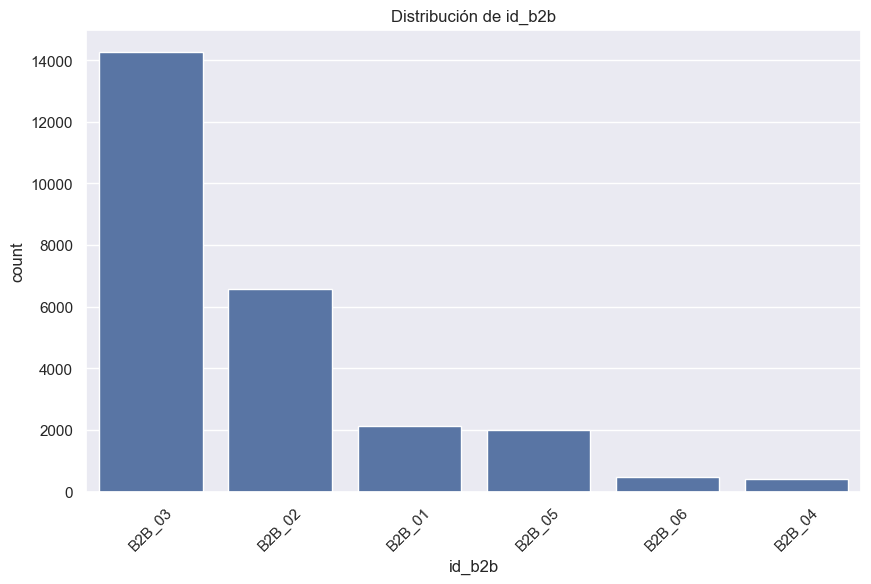

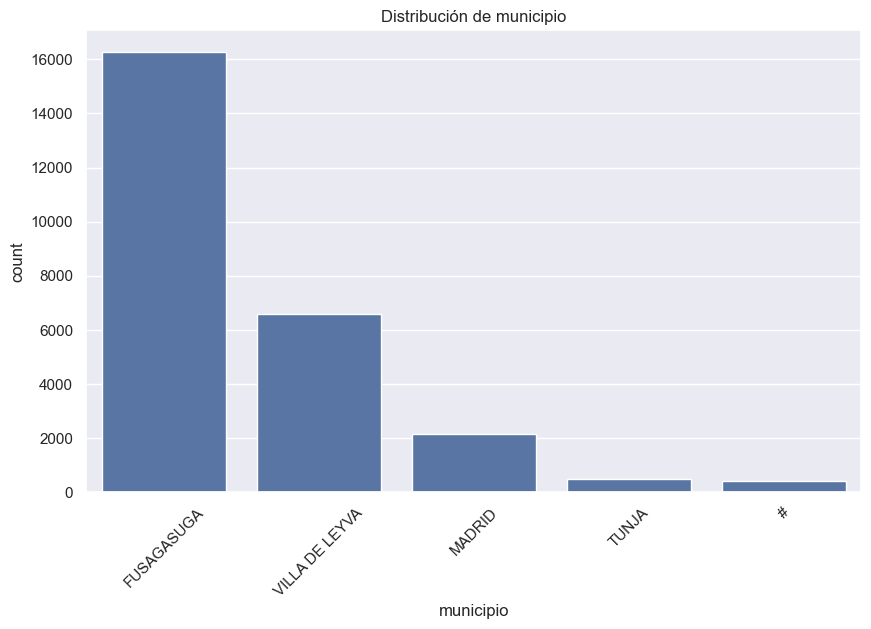

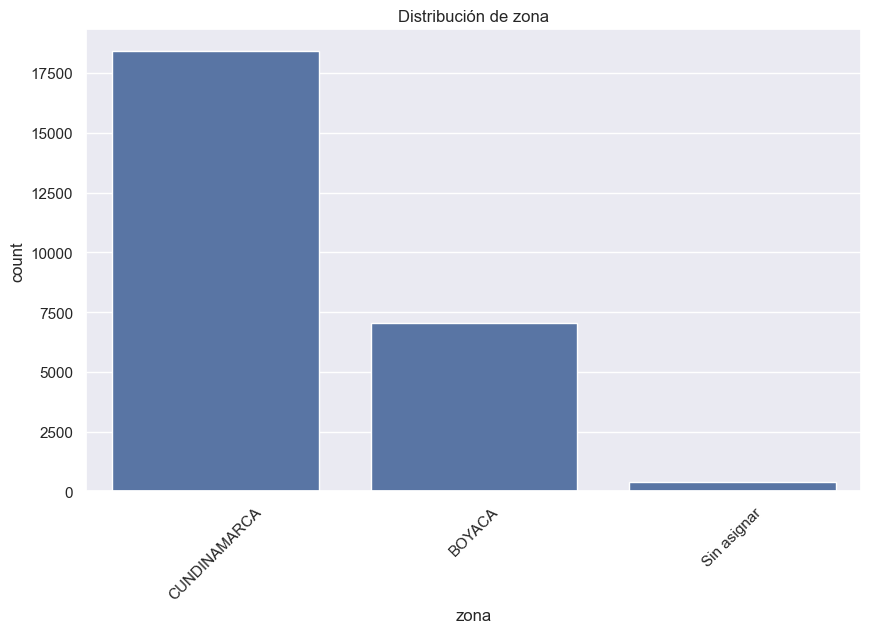

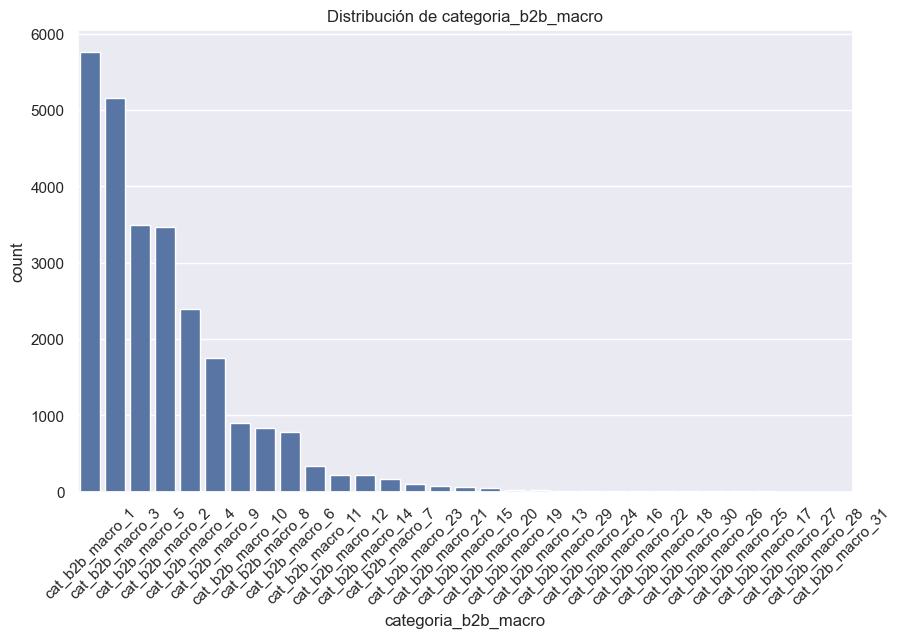

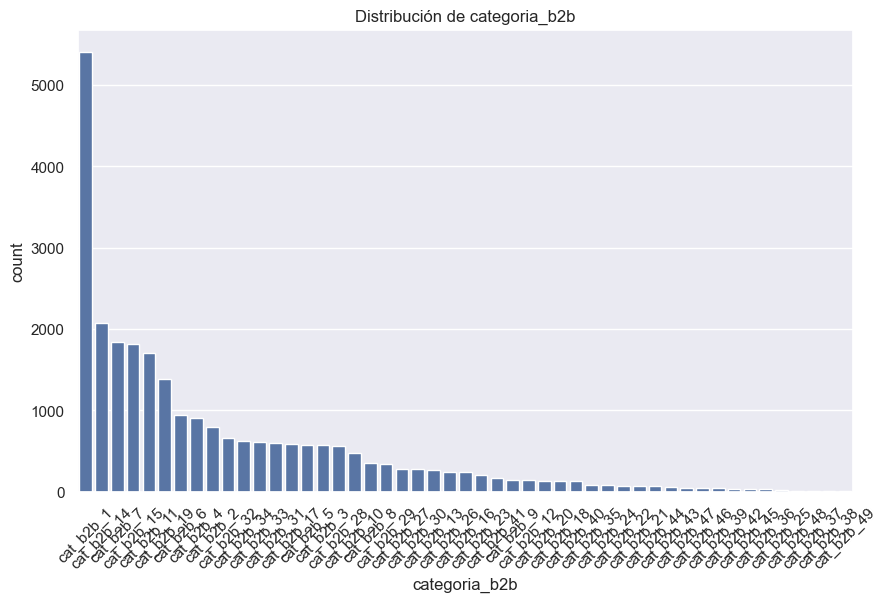

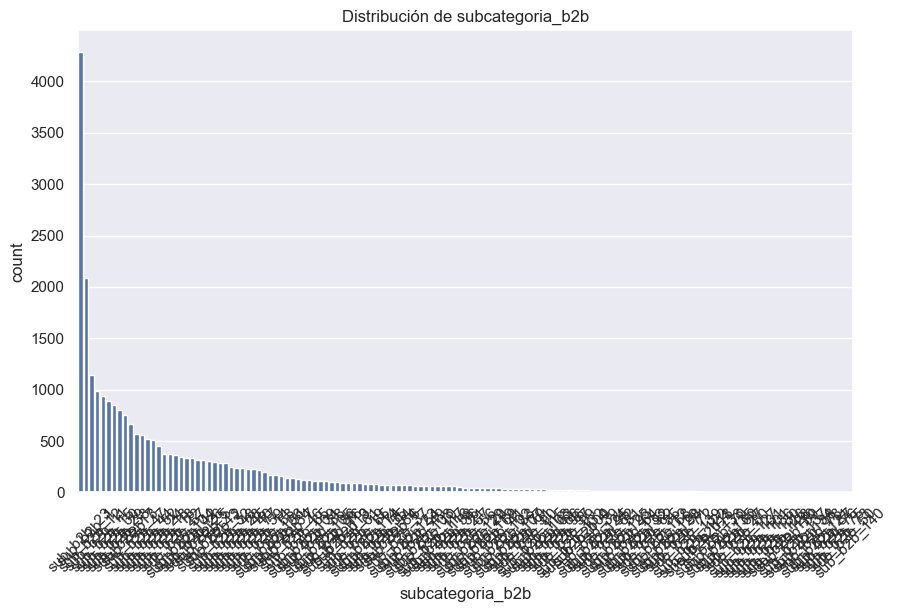

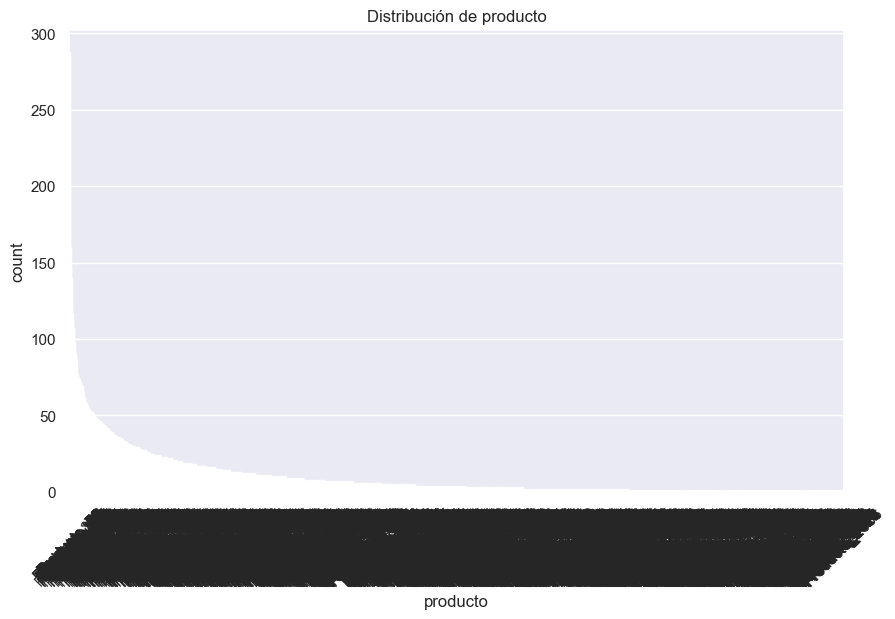

In [31]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_B2B, x=col, order=df_B2B[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

### 1.1.3 Atributos temporales

In [32]:
# Con esta tablita puedo ver que porcentaje representa cada clase, si se desea se puede cambiar la columna (tocaria una a una)
atributosTemporales = df_B2B['fecha_factura'].value_counts()
pd.DataFrame({'Valores de Grupo': atributosTemporales.index, 'Conteo': atributosTemporales.values, 'Porcentaje (%)': atributosTemporales.values * 100 / atributosTemporales.values.sum()}).sort_values(by='Conteo', ascending=False)

,Valores de Grupo,Conteo,Porcentaje (%)
0,2008-04-24,148,0.572180
1,2007-12-06,133,0.514189
2,2010-01-30,128,0.494858
3,2009-09-27,124,0.479394
4,2010-01-22,118,0.456197
...,...,...,...
1012,2008-06-14,1,0.003866
1011,2009-08-25,1,0.003866
1010,2008-07-09,1,0.003866
1009,2007-01-09,1,0.003866


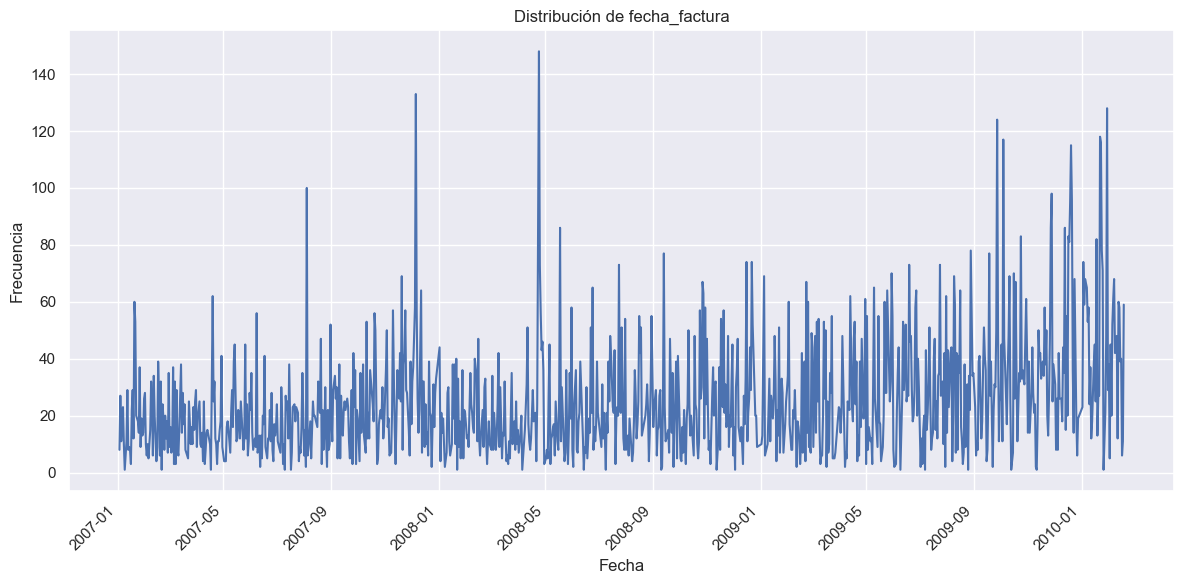

In [33]:
plt.figure(figsize=(12, 6))
df_B2B['fecha_factura'].value_counts().sort_index().plot(kind='line')
plt.title('Distribución de fecha_factura')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 1.2. Análisis de calidad de datos

### 1.2.1 Análisis de completitud

In [34]:
# Op1 Se ven el numero de valores nulos
porcentajeIncompletitudAtributo =  (100 * df_B2B.isnull().sum() / df_B2B.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porcentajeIncompletitudAtributo.index,
    "Completitud (%)": 100 - porcentajeIncompletitudAtributo.values,
    "Incompletitud (%)": porcentajeIncompletitudAtributo.values,
    "Numero de registros duplicados": porcentajeIncompletitudAtributo.values * df_B2B.shape[0] / 100
})

,Atributo,Completitud (%),Incompletitud (%),Numero de registros duplicados
0,fecha_factura,100.0,0.0,0.0
1,id_b2b,100.0,0.0,0.0
2,municipio,100.0,0.0,0.0
3,zona,100.0,0.0,0.0
4,categoria_b2b_macro,100.0,0.0,0.0
5,categoria_b2b,100.0,0.0,0.0
6,subcategoria_b2b,100.0,0.0,0.0
7,producto,100.0,0.0,0.0
8,valor_total,100.0,0.0,0.0
9,alineación con portafolio estratégico b2b,100.0,0.0,0.0


Se evidencia que los datos estan completos!

### 1.2.2 Análisis de Unicidad

In [35]:
# Duplicados
registrosDuplicados = df_B2B.duplicated()
totalDuplicados = registrosDuplicados.sum()
totalRegistros = df_B2B.shape[0]
porcentajeDuplicados = 100.0 * totalDuplicados / totalRegistros
print(f"Se cuenta con {totalDuplicados} registros duplicados ({porcentajeDuplicados:.2f}%)")


Se cuenta con 0 registros duplicados (0.00%)


No hay datos duplicados!

### 1.2.3 Análisis de Validez

#### Variables Categoricas

In [36]:
#CONSISTENCIA VARIABLES CATEGÓRICAS
df_B2B[categorical_cols].describe()

,id_b2b,municipio,zona,categoria_b2b_macro,categoria_b2b,subcategoria_b2b,producto
count,25866,25866,25866,25866,25866,25866,25866
unique,6,5,3,31,49,139,2564
top,B2B_03,FUSAGASUGA,CUNDINAMARCA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_23,Producto_377
freq,14282,16263,18405,5768,5413,4283,288


In [37]:
# Eg2: Se indica de los valores categoricos que son las "aceptadas"
categorical_expected = {
    #"race": ["Caucasian", "Asian", "African American", "Hispanic", "Other"],

}

In [38]:
# Verificación de variables categóricas esperadas
for col, expected_values in categorical_expected.items():
    invalid_values = df_B2B[~df_B2B[col].isin(expected_values)][col].unique()
    if len(invalid_values) > 0:
        print(f"\nValores no esperados en {col}: {invalid_values}")
    else:
        print(f"\nTodos los valores en {col} son válidos")

#### Variables Numericas

In [39]:
# Variables con un mínimo específico (en general es que las variables sean positivas)
numeric_minimums = {
    #"F_SALDO": 0,
}

# Variables con un máximo específico (Si no hay maximo se deja vacio)
numeric_maximums = {
    #"F_SALDO": 1,
}

# !!!! DE NO HABER MAX
# numeric_maximums = {}


# Verificar mínimos
for col, min_val in numeric_minimums.items():
    df_B2B[col] = pd.to_numeric(df_B2B[col], errors="coerce")  
    out_of_range = df_B2B[df_B2B[col] < min_val][col]  

    if not out_of_range.empty:
        print(f"\nValores menores a {min_val} en {col}:")
        print(out_of_range.describe())

# Verificar máximos
for col, max_val in numeric_maximums.items():
    df_B2B[col] = pd.to_numeric(df_B2B[col], errors="coerce")  
    out_of_range = df_B2B[df_B2B[col] > max_val][col]  

    if not out_of_range.empty:
        print(f"\nValores mayores a {max_val} en {col}:")
        print(out_of_range.describe())


### 1.2.4 Análisis de consistencia

In [40]:
# Verifica la fecha más antigua y más reciente que tengan sentido
print(df_B2B["fecha_factura"].min(), df_B2B["fecha_factura"].max())

2007-01-03 00:00:00 2010-02-18 00:00:00


In [41]:
#Verificar que esten las clasificaciones adecuadas para el target
pd.DataFrame(df_B2B["municipio"].unique(), columns=["Label unicos"])

,Label unicos
0,MADRID
1,VILLA DE LEYVA
2,FUSAGASUGA
3,#
4,TUNJA


Es necesario preguntar a que hace referencia el #!!!! No tiene mucho sentido en el contexto de municipios de Colombia

In [42]:
#Verificar que esten las clasificaciones adecuadas para el target
pd.DataFrame(df_B2B["zona"].unique(), columns=["Label unicos"])

,Label unicos
0,CUNDINAMARCA
1,BOYACA
2,Sin asignar


In [43]:
#Verificar que esten las clasificaciones adecuadas para el target
pd.DataFrame(df_B2B["categoria_b2b_macro"].unique(), columns=["Label unicos"])

,Label unicos
0,cat_b2b_macro_1
1,cat_b2b_macro_2
2,cat_b2b_macro_4
3,cat_b2b_macro_5
4,cat_b2b_macro_6
5,cat_b2b_macro_7
6,cat_b2b_macro_8
7,cat_b2b_macro_9
8,cat_b2b_macro_10
9,cat_b2b_macro_11


In [44]:
#Verificar que esten las clasificaciones adecuadas para el target
pd.DataFrame(df_B2B["categoria_b2b"].unique(), columns=["Label unicos"])

,Label unicos
0,cat_b2b_1
1,cat_b2b_3
2,cat_b2b_8
3,cat_b2b_2
4,cat_b2b_9
5,cat_b2b_4
6,cat_b2b_10
7,cat_b2b_11
8,cat_b2b_12
9,cat_b2b_13


In [45]:
#Verificar que esten las clasificaciones adecuadas para el target
pd.DataFrame(df_B2B["subcategoria_b2b"].unique(), columns=["Label unicos"])

,Label unicos
0,sub_b2b_1
1,sub_b2b_3
2,sub_b2b_11
3,sub_b2b_12
4,sub_b2b_13
...,...
134,sub_b2b_137
135,sub_b2b_138
136,sub_b2b_139
137,sub_b2b_88


In [46]:
#Verificar que esten las clasificaciones adecuadas para el target
pd.DataFrame(df_B2B["producto"].unique(), columns=["Label unicos"])

,Label unicos
0,Producto_1
1,Producto_2
2,Producto_4
3,Producto_13
4,Producto_14
...,...
2559,Producto_2683
2560,Producto_131
2561,Producto_2684
2562,Producto_2685


No se realizó la preparación de datos para esta base ya que cumple con todos los requisitos de calidad para ser tratada y manipulada en los modelos

# 2. Selección y Nuevas Variables

### Conteo Nacional Unidades Económicas - Total Unidades

In [47]:
import pandas as pd
df_CN = pd.read_excel('Conteo_Nacional.xlsx', sheet_name='UE')

In [48]:
df_CN.head(1)

,Departamento,Código Municipio,Municipio,Total de unidades,Participación en total Departamental,Promedio por manzana,"Tasa de unidades por manzana, estandarizada por el número de manzanas*","Tasa de unidades por habitante, estandarizada por el tamaño poblacional**"
0,Boyacá,15001,Tunja,16436,19.59,6.94,1123.95,642.72


In [49]:
def quitar_tildes(texto):
    if isinstance(texto, str):
        reemplazos = str.maketrans('áéíóúÁÉÍÓÚ', 'aeiouAEIOU')
        return texto.translate(reemplazos)
    return texto

df_B2B['municipio_normalizado'] = df_B2B['municipio'].apply(lambda x: quitar_tildes(str(x)).strip().lower())
df_CN['municipio_normalizado'] = df_CN['Municipio'].apply(lambda x: quitar_tildes(str(x)).strip().lower())


df_B2B = df_B2B.merge(
    df_CN[['municipio_normalizado', 'Total de unidades']],
    on='municipio_normalizado',
    how='left'
)


df_B2B.drop(columns=['municipio_normalizado'], inplace=True)



In [50]:
df_B2B

,fecha_factura,id_b2b,municipio,zona,categoria_b2b_macro,categoria_b2b,subcategoria_b2b,producto,valor_total,alineación con portafolio estratégico b2b,Total de unidades
0,2007-01-03,B2B_01,MADRID,CUNDINAMARCA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_1,Producto_1,1819.931192,0.000216,4718.0
1,2007-01-03,B2B_01,MADRID,CUNDINAMARCA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_1,Producto_2,1713.359382,0.000077,4718.0
2,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_2,cat_b2b_3,sub_b2b_3,Producto_4,208.510406,0.000069,1635.0
3,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_11,Producto_13,3319.449852,0.000308,1635.0
4,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_12,Producto_14,4945.685288,0.000110,1635.0
...,...,...,...,...,...,...,...,...,...,...,...
25861,2010-02-18,B2B_05,FUSAGASUGA,CUNDINAMARCA,cat_b2b_macro_11,cat_b2b_14,sub_b2b_23,Producto_66,303.853648,0.000654,9805.0
25862,2010-02-18,B2B_05,FUSAGASUGA,CUNDINAMARCA,cat_b2b_macro_14,cat_b2b_14,sub_b2b_23,Producto_809,85.641002,0.000654,9805.0
25863,2010-02-18,B2B_05,FUSAGASUGA,CUNDINAMARCA,cat_b2b_macro_15,cat_b2b_15,sub_b2b_24,Producto_1049,75.615354,0.000654,9805.0
25864,2010-02-18,B2B_06,TUNJA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_43,Producto_1255,2640.812674,0.000654,16436.0


### Conteo Nacional Unidades Económicas - Total Edificios en Construcción

In [51]:
import pandas as pd
df_CN = pd.read_excel('Conteo_Nacional.xlsx', sheet_name='Edificios')

In [52]:
df_CN.head(1)

,Código Departamento,Departamento,Código Municipio,Municipio,Total de edificaciones en obra,Participación,Promedio por manzana,"Tasa de Edificaciones en obra por manzana, estandarizada por el número de manzanas*","Tasa de Edificaciones en obra por habitante, estandarizada por el tamaño poblacional**"
0,5,Antioquia,5001,Medellín,451,21.04,0.03,4.98,1.2


In [53]:
def quitar_tildes(texto):
    if isinstance(texto, str):
        reemplazos = str.maketrans('áéíóúÁÉÍÓÚ', 'aeiouAEIOU')
        return texto.translate(reemplazos)
    return texto

df_B2B['municipio_normalizado'] = df_B2B['municipio'].apply(lambda x: quitar_tildes(str(x)).strip().lower())
df_CN['municipio_normalizado'] = df_CN['Municipio'].apply(lambda x: quitar_tildes(str(x)).strip().lower())

df_B2B = df_B2B.merge(
    df_CN[['municipio_normalizado', 'Total de edificaciones en obra']],
    on='municipio_normalizado',
    how='left'
)

df_B2B.drop(columns=['municipio_normalizado'], inplace=True)


In [54]:
df_B2B.sample(10)

,fecha_factura,id_b2b,municipio,zona,categoria_b2b_macro,categoria_b2b,subcategoria_b2b,producto,valor_total,alineación con portafolio estratégico b2b,Total de unidades,Total de edificaciones en obra
15152,2009-07-11,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_22,Producto_332,2689.758700,0.000180,1635.0,23.0
14270,2009-04-03,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_11,cat_b2b_14,sub_b2b_23,Producto_180,350.041832,0.000281,1635.0,23.0
10663,2008-05-06,B2B_03,FUSAGASUGA,CUNDINAMARCA,cat_b2b_macro_5,cat_b2b_33,sub_b2b_57,Producto_878,327.566948,0.000345,9805.0,82.0
1166,2007-07-31,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_1,Producto_222,2196.695596,0.000189,1635.0,23.0
18070,2009-03-04,B2B_03,FUSAGASUGA,CUNDINAMARCA,cat_b2b_macro_9,cat_b2b_15,sub_b2b_23,Producto_55,933.754818,0.000386,9805.0,82.0
11558,2008-07-24,B2B_03,FUSAGASUGA,CUNDINAMARCA,cat_b2b_macro_3,cat_b2b_19,sub_b2b_42,Producto_1868,4935.963328,0.000162,9805.0,82.0
15993,2009-10-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_2,cat_b2b_36,sub_b2b_66,Producto_2196,152.439544,0.000277,1635.0,23.0
22535,2009-11-06,B2B_03,FUSAGASUGA,CUNDINAMARCA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_1,Producto_232,2749.001524,0.000283,9805.0,82.0
1354,2007-08-28,B2B_01,MADRID,CUNDINAMARCA,cat_b2b_macro_3,cat_b2b_7,sub_b2b_33,Producto_226,954.315876,0.000286,4718.0,26.0
275,2007-02-05,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_11,Producto_220,544.902054,0.000377,1635.0,23.0


Ya que no se tiene información de los datos con municipio: # y sin zona se les asigna un promedio de los valores de las nuevas columnas a partir de la información de los departamentos tratados en esta base de datos

In [55]:

promedios_por_departamento = df_B2B[df_B2B['zona'].isin(['BOYACA', 'CUNDINAMARCA'])].groupby('zona')[
    ['Total de unidades', 'Total de edificaciones en obra']
].mean()

promedio_total = promedios_por_departamento.mean()


df_B2B.loc[df_B2B['municipio'] == '#', 'Total de unidades'] = promedio_total['Total de unidades']
df_B2B.loc[df_B2B['municipio'] == '#', 'Total de edificaciones en obra'] = promedio_total['Total de edificaciones en obra']


In [56]:
df_B2B[df_B2B['municipio'] == '#']


,fecha_factura,id_b2b,municipio,zona,categoria_b2b_macro,categoria_b2b,subcategoria_b2b,producto,valor_total,alineación con portafolio estratégico b2b,Total de unidades,Total de edificaciones en obra
8657,2008-11-09,B2B_04,#,Sin asignar,cat_b2b_macro_3,cat_b2b_7,sub_b2b_29,Producto_1442,344.758844,0.000285,5925.943577,51.513552
8993,2008-12-16,B2B_04,#,Sin asignar,cat_b2b_macro_3,cat_b2b_6,sub_b2b_6,Producto_1669,122.561772,0.000334,5925.943577,51.513552
13789,2009-01-10,B2B_04,#,Sin asignar,cat_b2b_macro_6,cat_b2b_12,sub_b2b_20,Producto_1650,1513.675648,0.000144,5925.943577,51.513552
13790,2009-01-10,B2B_04,#,Sin asignar,cat_b2b_macro_3,cat_b2b_7,sub_b2b_29,Producto_88,808.553524,0.000170,5925.943577,51.513552
13791,2009-01-10,B2B_04,#,Sin asignar,cat_b2b_macro_1,cat_b2b_1,sub_b2b_11,Producto_169,7548.826846,0.000369,5925.943577,51.513552
...,...,...,...,...,...,...,...,...,...,...,...,...
24385,2010-02-12,B2B_04,#,Sin asignar,cat_b2b_macro_5,cat_b2b_28,sub_b2b_44,Producto_2618,67.391128,0.000654,5925.943577,51.513552
24414,2010-02-14,B2B_04,#,Sin asignar,cat_b2b_macro_2,cat_b2b_2,sub_b2b_13,Producto_770,312.967246,0.000654,5925.943577,51.513552
24415,2010-02-14,B2B_04,#,Sin asignar,cat_b2b_macro_2,cat_b2b_4,sub_b2b_15,Producto_83,277.124174,0.000654,5925.943577,51.513552
24435,2010-02-18,B2B_04,#,Sin asignar,cat_b2b_macro_1,cat_b2b_1,sub_b2b_22,Producto_1162,2460.419044,0.000654,5925.943577,51.513552


# 3. Preparacion de datos para modelado

## 3.1. Volver a revisar calidad de datos

### 3.1.1 Completitud

In [57]:
# Op1 Se ven el numero de valores nulos
porcentajeIncompletitudAtributo =  (100 * df_B2B.isnull().sum() / df_B2B.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porcentajeIncompletitudAtributo.index,
    "Completitud (%)": 100 - porcentajeIncompletitudAtributo.values,
    "Incompletitud (%)": porcentajeIncompletitudAtributo.values,
    "Numero de registros duplicados": porcentajeIncompletitudAtributo.values * df_B2B.shape[0] / 100
})

,Atributo,Completitud (%),Incompletitud (%),Numero de registros duplicados
0,fecha_factura,100.0,0.0,0.0
1,id_b2b,100.0,0.0,0.0
2,municipio,100.0,0.0,0.0
3,zona,100.0,0.0,0.0
4,categoria_b2b_macro,100.0,0.0,0.0
5,categoria_b2b,100.0,0.0,0.0
6,subcategoria_b2b,100.0,0.0,0.0
7,producto,100.0,0.0,0.0
8,valor_total,100.0,0.0,0.0
9,alineación con portafolio estratégico b2b,100.0,0.0,0.0


### 3.1.2 Duplicados

In [58]:
# Duplicados
registrosDuplicados = df_B2B.duplicated()
totalDuplicados = registrosDuplicados.sum()
totalRegistros = df_B2B.shape[0]
porcentajeDuplicados = 100.0 * totalDuplicados / totalRegistros
print(f"Se cuenta con {totalDuplicados} registros duplicados ({porcentajeDuplicados:.2f}%)")


Se cuenta con 0 registros duplicados (0.00%)


In [59]:
df_modified = df_B2B.copy()

### 3.1.3 Reemplazar # por desconocido

Al hablar con el experto nos indica que el # en el municipio indica que este es un valor desconocido, por lo que se reemplaza por la palabra desconocido.

In [60]:
df_modified['municipio'] = df_modified['municipio'].replace({'#': 'DESCONOCIDO'})
pd.DataFrame(df_modified["municipio"].unique(), columns=["Label unicos"])

,Label unicos
0,MADRID
1,VILLA DE LEYVA
2,FUSAGASUGA
3,DESCONOCIDO
4,TUNJA


### 3.1.4 Codificar variables categoricas

In [61]:
df_modified.head(5)

,fecha_factura,id_b2b,municipio,zona,categoria_b2b_macro,categoria_b2b,subcategoria_b2b,producto,valor_total,alineación con portafolio estratégico b2b,Total de unidades,Total de edificaciones en obra
0,2007-01-03,B2B_01,MADRID,CUNDINAMARCA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_1,Producto_1,1819.931192,0.000216,4718.0,26.0
1,2007-01-03,B2B_01,MADRID,CUNDINAMARCA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_1,Producto_2,1713.359382,0.000077,4718.0,26.0
2,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_2,cat_b2b_3,sub_b2b_3,Producto_4,208.510406,0.000069,1635.0,23.0
3,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_11,Producto_13,3319.449852,0.000308,1635.0,23.0
4,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_12,Producto_14,4945.685288,0.000110,1635.0,23.0


In [62]:
atributosCat = df_modified.select_dtypes(include=[object]).columns
atributosCat

Index(['id_b2b', 'municipio', 'zona', 'categoria_b2b_macro', 'categoria_b2b',
       'subcategoria_b2b', 'producto'],
      dtype='object')

In [63]:
df_encoded = pd.get_dummies(df_modified, columns=atributosCat, drop_first=False)
df_encoded.head()

,fecha_factura,valor_total,alineación con portafolio estratégico b2b,Total de unidades,Total de edificaciones en obra,id_b2b_B2B_01,id_b2b_B2B_02,id_b2b_B2B_03,id_b2b_B2B_04,id_b2b_B2B_05,...,producto_Producto_990,producto_Producto_991,producto_Producto_992,producto_Producto_993,producto_Producto_994,producto_Producto_995,producto_Producto_996,producto_Producto_997,producto_Producto_998,producto_Producto_999
0,2007-01-03,1819.931192,0.000216,4718.0,26.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2007-01-03,1713.359382,0.000077,4718.0,26.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2007-01-04,208.510406,0.000069,1635.0,23.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2007-01-04,3319.449852,0.000308,1635.0,23.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2007-01-04,4945.685288,0.000110,1635.0,23.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 3.1.5 Escalar datos

In [64]:
# Drop datetime columns before scaling
df_numeric = df_encoded.select_dtypes(exclude=['datetime64'])

standard_scaler = StandardScaler()
scaled = standard_scaler.fit_transform(df_numeric)
scaled

array([[ 0.12575768, -0.5064465 , -0.70220555, ..., -0.03627943,
        -0.01243652, -0.02564499],
       [ 0.07855875, -1.40164705, -0.70220555, ..., -0.03627943,
        -0.01243652, -0.02564499],
       [-0.58791457, -1.45245968, -1.5193338 , ..., -0.03627943,
        -0.01243652, -0.02564499],
       ...,
       [-0.64677164,  2.31491051,  0.64606933, ..., -0.03627943,
        -0.01243652, -0.02564499],
       [ 0.48931284,  2.31491051,  2.40357094, ..., -0.03627943,
        -0.01243652, -0.02564499],
       [ 0.48931284,  2.31491051,  2.40357094, ..., -0.03627943,
        -0.01243652, -0.02564499]])

In [65]:
df_scaled = pd.DataFrame(scaled, columns=df_numeric.columns)
df_scaled

,valor_total,alineación con portafolio estratégico b2b,Total de unidades,Total de edificaciones en obra,id_b2b_B2B_01,id_b2b_B2B_02,id_b2b_B2B_03,id_b2b_B2B_04,id_b2b_B2B_05,id_b2b_B2B_06,...,producto_Producto_990,producto_Producto_991,producto_Producto_992,producto_Producto_993,producto_Producto_994,producto_Producto_995,producto_Producto_996,producto_Producto_997,producto_Producto_998,producto_Producto_999
0,0.125758,-0.506446,-0.702206,-1.304922,3.328007,-0.584285,-1.110364,-0.125169,-0.287991,-0.137361,...,-0.006218,-0.016453,-0.027113,-0.029833,-0.028505,-0.01077,-0.022424,-0.036279,-0.012437,-0.025645
1,0.078559,-1.401647,-0.702206,-1.304922,3.328007,-0.584285,-1.110364,-0.125169,-0.287991,-0.137361,...,-0.006218,-0.016453,-0.027113,-0.029833,-0.028505,-0.01077,-0.022424,-0.036279,-0.012437,-0.025645
2,-0.587915,-1.452460,-1.519334,-1.413591,-0.300480,1.711494,-1.110364,-0.125169,-0.287991,-0.137361,...,-0.006218,-0.016453,-0.027113,-0.029833,-0.028505,-0.01077,-0.022424,-0.036279,-0.012437,-0.025645
3,0.789870,0.088549,-1.519334,-1.413591,-0.300480,1.711494,-1.110364,-0.125169,-0.287991,-0.137361,...,-0.006218,-0.016453,-0.027113,-0.029833,-0.028505,-0.01077,-0.022424,-0.036279,-0.012437,-0.025645
4,1.510104,-1.188925,-1.519334,-1.413591,-0.300480,1.711494,-1.110364,-0.125169,-0.287991,-0.137361,...,-0.006218,-0.016453,-0.027113,-0.029833,-0.028505,-0.01077,-0.022424,-0.036279,-0.012437,-0.025645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25861,-0.545689,2.314911,0.646069,0.723565,-0.300480,-0.584285,-1.110364,-0.125169,3.472325,-0.137361,...,-0.006218,-0.016453,-0.027113,-0.029833,-0.028505,-0.01077,-0.022424,-0.036279,-0.012437,-0.025645
25862,-0.642331,2.314911,0.646069,0.723565,-0.300480,-0.584285,-1.110364,-0.125169,3.472325,-0.137361,...,-0.006218,-0.016453,-0.027113,-0.029833,-0.028505,-0.01077,-0.022424,-0.036279,-0.012437,-0.025645
25863,-0.646772,2.314911,0.646069,0.723565,-0.300480,-0.584285,-1.110364,-0.125169,3.472325,-0.137361,...,-0.006218,-0.016453,-0.027113,-0.029833,-0.028505,-0.01077,-0.022424,-0.036279,-0.012437,-0.025645
25864,0.489313,2.314911,2.403571,1.013349,-0.300480,-0.584285,-1.110364,-0.125169,-0.287991,7.280110,...,-0.006218,-0.016453,-0.027113,-0.029833,-0.028505,-0.01077,-0.022424,-0.036279,-0.012437,-0.025645


# 4. Clusters para evidenciar los tipos de clientes

## 4.1. KMeans

### 4.1.1 Seleccion de hiperparametros

#### 4.1.1.1 Metodo del codo


In [66]:
def elbow_plot(X, model, k_min=2, k_max=20):
    """
    Genera la gráfica para el método del codo usando KMeans
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    inertias = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el valor de inercia
        inertias.append(model_k.inertia_)
    
    # Graficamos los valores de inercia
    plt.plot(range(k_min,k_max+1), inertias, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.grid()
    plt.show()

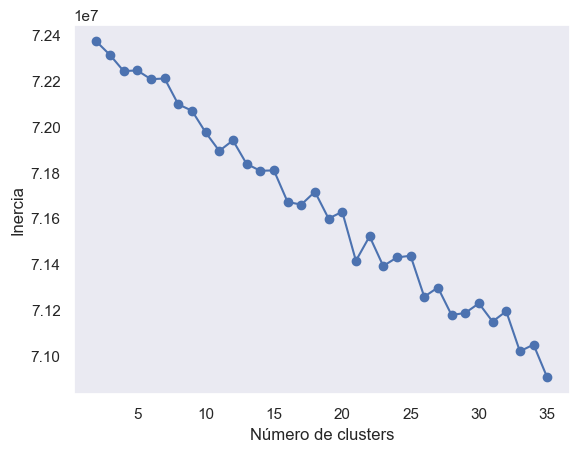

In [67]:
elbow_plot(df_scaled, "kmeans", 2, 35)

#### 4.1.1.2 Metodo de la Silueta (Valor global)


In [68]:
def silhouette_plot(X, model, k_min=2, k_max=5):
    """
    Genera la gráfica con el coeficiente de la silueta
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    scores = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el coeficiente de la silueta
        score = silhouette_score(X, model_k.labels_)
        scores.append(score)
    
    # Graficamos los valores del coeficiente de la silueta
    plt.plot(range(k_min,k_max+1), scores, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

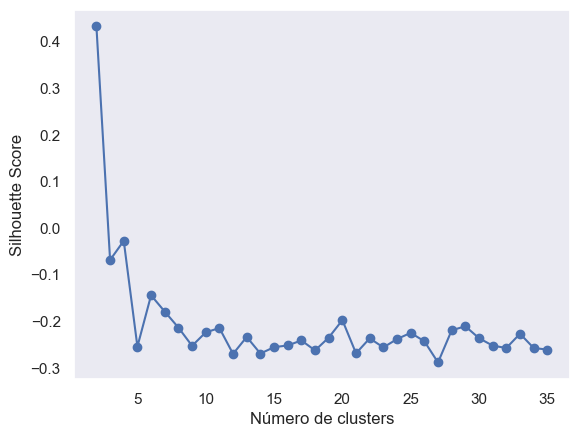

In [69]:
silhouette_plot(df_scaled, "kmeans", 2, 35)

#### 4.1.1.3 Mejor modelo

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)  # retain 90% variance
df_pca = pca.fit_transform(df_scaled)

In [71]:
### Se ingresa en el n_clusters el k encontrado previamente de los analisis
km_model = KMeans(n_clusters=4, n_init="auto", random_state=0)
km_model.fit(df_pca)

KMeans(n_clusters=4, random_state=0)

In [72]:
# Se calcula el valor de la silueta para evaluar que tan bueno es el modelo
clusters = km_model.predict(df_pca)
print(f"Coeficiente de Silueta: {silhouette_score(df_scaled, km_model.labels_)}")


Coeficiente de Silueta: 0.1324783150774396


#### 4.1.1.4 Grafica PCA

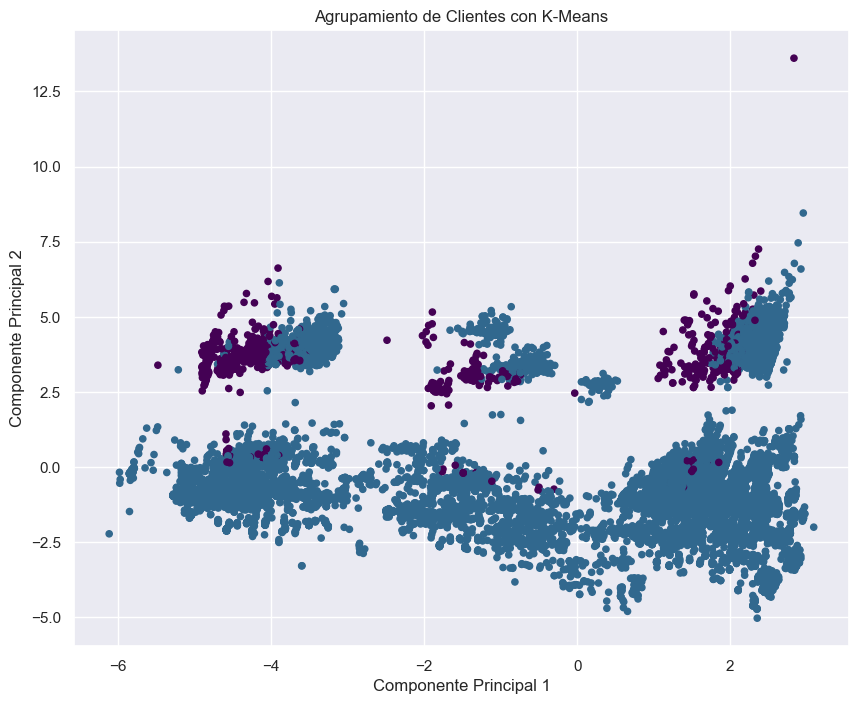

In [73]:
pca = PCA(n_components=2)
clients_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(clients_pca[:, 0], clients_pca[:, 1], c=clusters, cmap='viridis', s=20)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Agrupamiento de Clientes con K-Means')
plt.grid(True)
plt.show()

## 4.2. DBSCAN

In [74]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=16, min_samples=5)
labels = dbscan.fit_predict(df_pca)

# Check how many clusters were found
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Only calculate silhouette score if more than 1 cluster
if n_clusters > 1:
    print(f"Silhouette Score: {silhouette_score(df_pca, labels)}")


Número de clusters encontrados: 1178
Silhouette Score: 0.787105080937653


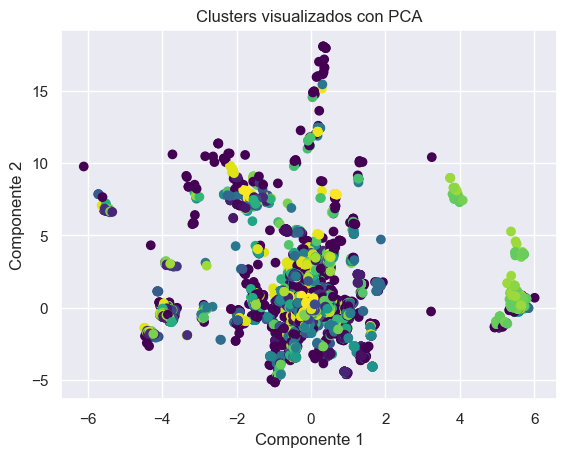

In [75]:
plt.scatter(df_pca[:, 12], df_pca[:, 8], c=labels, cmap='viridis')
plt.title("Clusters visualizados con PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


## 4.3 META - CLUSTERS

In [83]:
# 1. Copiar el DataFrame original y añadir los clusters
df_clustered = df.copy()
df_clustered['dbscan_cluster'] = labels

# 2. Filtrar solo los puntos que NO son outliers
valid_clusters = df_clustered[df_clustered['dbscan_cluster'] != -1]

# 3. Seleccionar solo las columnas numéricas para calcular los centroides
numeric_cols = valid_clusters.select_dtypes(include=[np.number]).columns
numeric_features = valid_clusters[numeric_cols]

# 4. Agrupar por cluster y calcular centroides
cluster_centroids = numeric_features.groupby(valid_clusters['dbscan_cluster']).mean()

# 5. KMeans sobre los centroides (por ejemplo, para 10 grupos)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
meta_labels = kmeans.fit_predict(cluster_centroids)

# 6. Mapear los meta-clusters a los puntos originales
mapping = dict(zip(cluster_centroids.index, meta_labels))
df_clustered['meta_cluster'] = df_clustered['dbscan_cluster'].map(mapping)


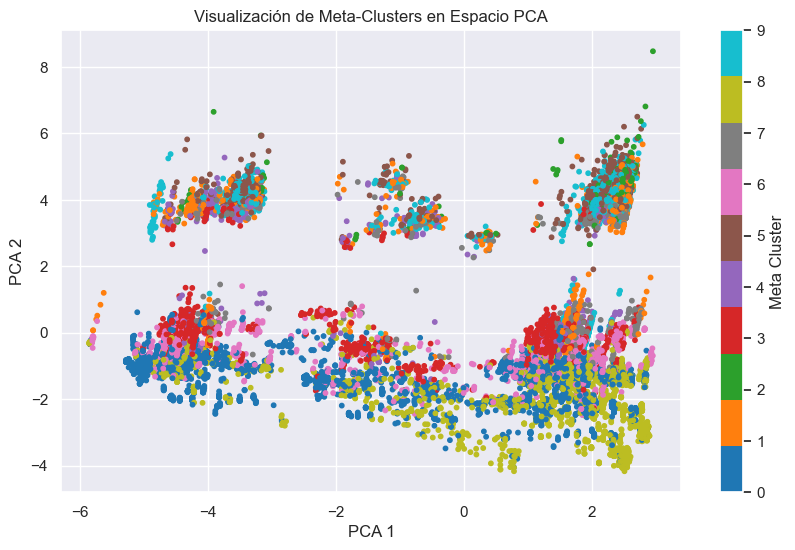

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_clustered['meta_cluster'], cmap='tab10', s=10)
plt.colorbar(scatter, label='Meta Cluster')
plt.title('Visualización de Meta-Clusters en Espacio PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


## 4.3.1 Descripcion de los clusters

#### Cantidad por cluster

In [89]:
df_clustered['meta_cluster'].value_counts().sort_index()


meta_cluster
0.0    8416
1.0    1533
2.0     299
3.0    2457
4.0    1207
5.0    1120
6.0    2128
7.0     925
8.0    4212
9.0    1238
Name: count, dtype: int64

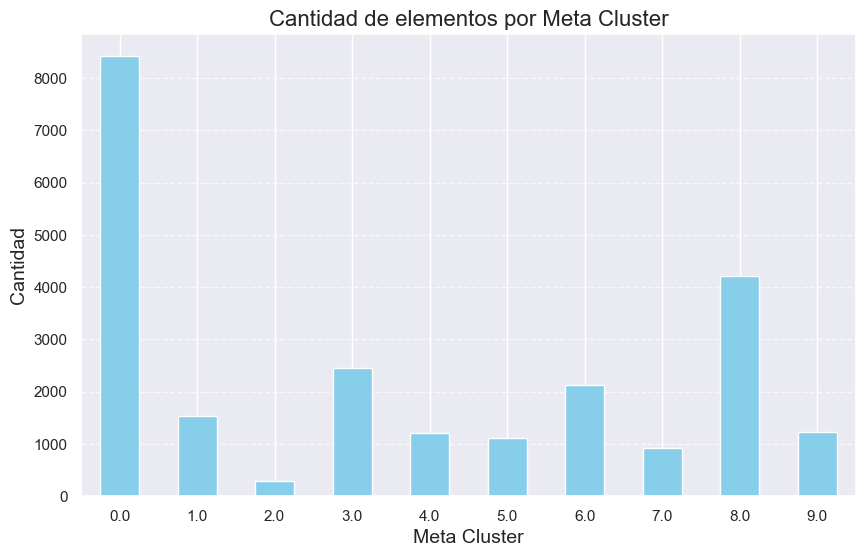

In [95]:
# Contar los elementos por meta_cluster y graficar
df_clustered['meta_cluster'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='skyblue')

# Configurar el título y etiquetas
plt.title('Cantidad de elementos por Meta Cluster', fontsize=16)
plt.xlabel('Meta Cluster', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Productos en los clusters

In [86]:
top_productos = df_clustered.groupby('meta_cluster')['producto'].value_counts().groupby(level=0).head(3)
print(top_productos)


meta_cluster  producto     
0.0           Producto_55      170
              Producto_54      160
              Producto_56      160
1.0           Producto_377     288
              Producto_1480     75
              Producto_1994     56
2.0           Producto_721      44
              Producto_438      41
              Producto_354      27
3.0           Producto_167     201
              Producto_73      147
              Producto_157      95
4.0           Producto_61      117
              Producto_143      75
              Producto_121      45
5.0           Producto_1569     62
              Producto_170      59
              Producto_251      58
6.0           Producto_325      74
              Producto_67       74
              Producto_895      69
7.0           Producto_1479    100
              Producto_824      76
              Producto_1495     49
8.0           Producto_1540     73
              Producto_979      63
              Producto_431      62
9.0           Producto_910 

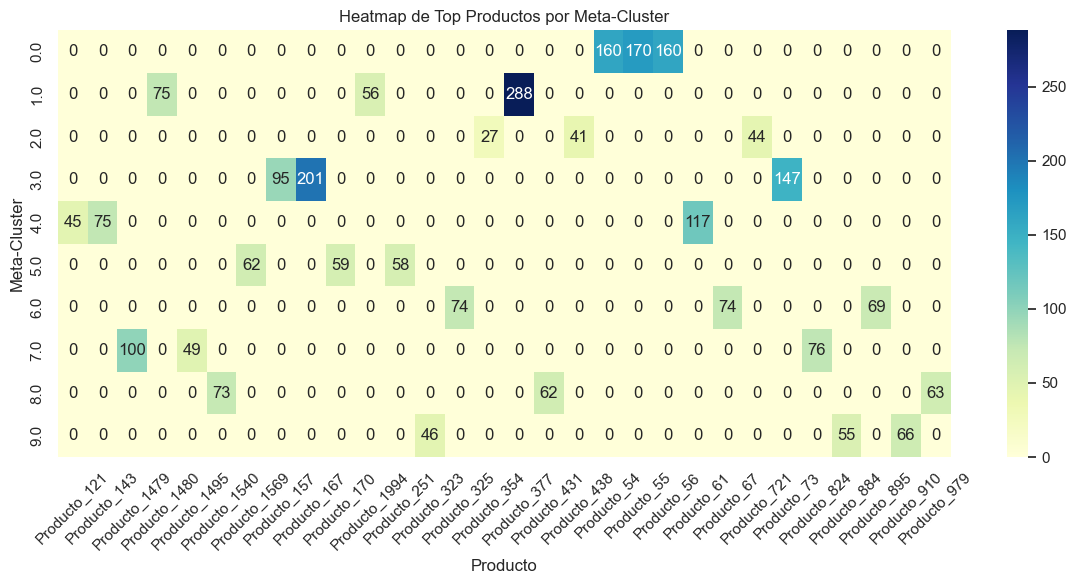

In [91]:
pivot = top_productos.pivot(index="meta_cluster", columns="producto", values="conteo").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap de Top Productos por Meta-Cluster")
plt.xlabel("Producto")
plt.ylabel("Meta-Cluster")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/lb/6vdrbbsj6mjgyd4k3jj3x65w0000gn/T/ipykernel_78970/602761314.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_cluster, x='producto', y='conteo', ax=axes[i], palette='pastel')
/var/folders/lb/6vdrbbsj6mjgyd4k3jj3x65w0000gn/T/ipykernel_78970/602761314.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_cluster, x='producto', y='conteo', ax=axes[i], palette='pastel')
/var/folders/lb/6vdrbbsj6mjgyd4k3jj3x65w0000gn/T/ipykernel_78970/602761314.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_clu

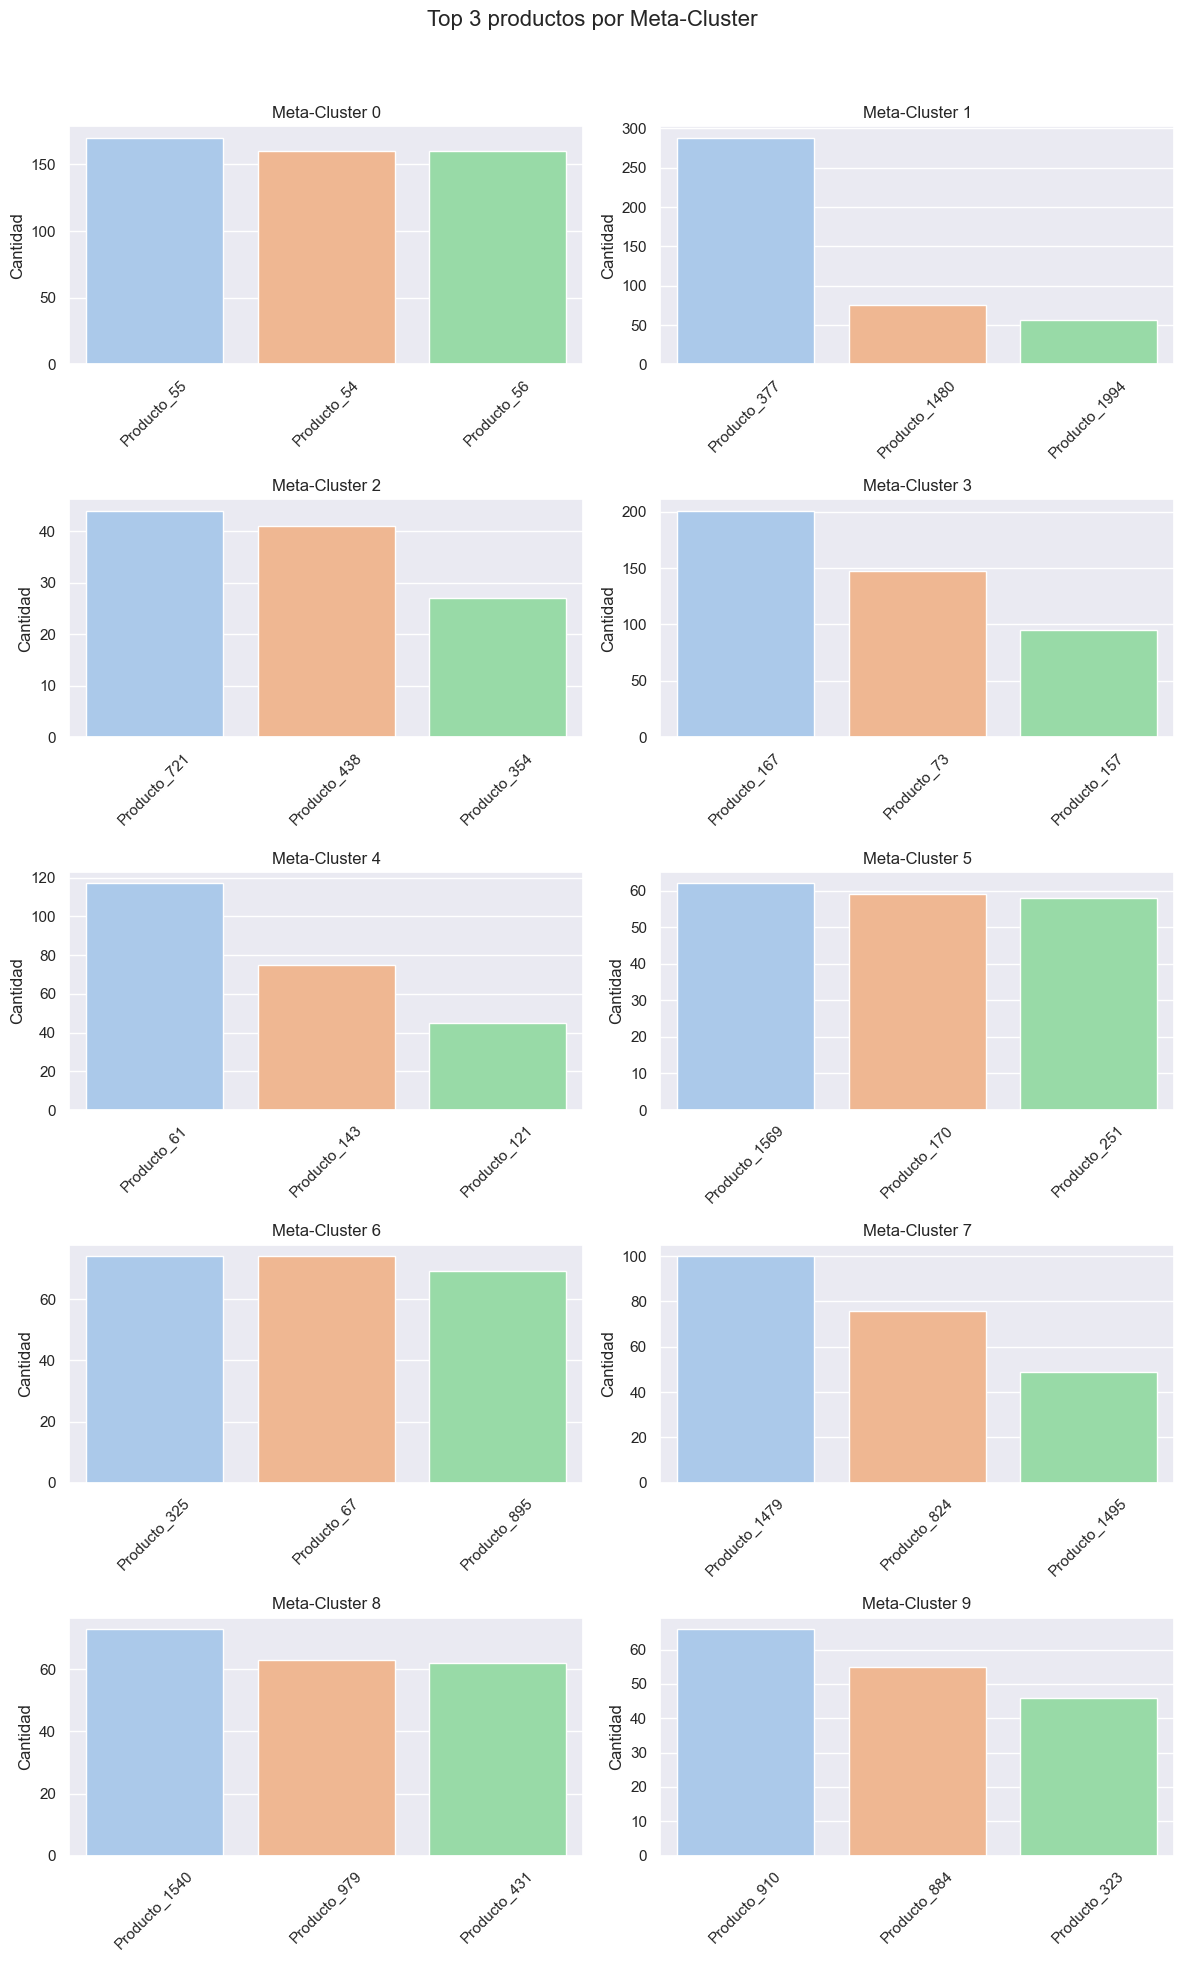

In [94]:
# Dividir el dataframe en grupos por meta_cluster
clusters_unicos = top_productos['meta_cluster'].unique()
num_clusters = len(clusters_unicos)

# Crear subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 4*num_clusters//2))
axes = axes.flatten()

for i, cluster in enumerate(clusters_unicos):
    data_cluster = top_productos[top_productos['meta_cluster'] == cluster]
    sns.barplot(data=data_cluster, x='producto', y='conteo', ax=axes[i], palette='pastel')
    axes[i].set_title(f'Meta-Cluster {int(cluster)}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Cantidad')
    axes[i].tick_params(axis='x', rotation=45)

# Ajuste final
plt.suptitle('Top 3 productos por Meta-Cluster', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
